**Seeding for reproducibility**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:23<00:00, 78.7MB/s]
100% 2.04G/2.04G [00:23<00:00, 94.9MB/s]


In [ ]:
!ls

drive  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___healthy', 'Potato___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___healthy', 'Potato___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___healthy', 'Potato___healthy', 'Orange___Haunglongbing_(Citrus_greening)']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['d68b653c-4fe7-49ee-80d4-1f0c84092242___Mt.N.V_HL 6077.JPG', '87c9d8e2-3009-4e40-9db4-8fe35ab76599___Mt.N.V_HL 6058.JPG', '94ff1dad-4284-4b83-ae37-988cc12c2006___Mt.N.V_HL 8939.JPG', 'ff99a93a-ec9b-4a6d-a5e1-1a015cada478___Mt.N.V_HL 9057.JPG', '8d435543-bb52-4a00-a84a-02404010cb33___Mt.N.V_HL 9061.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


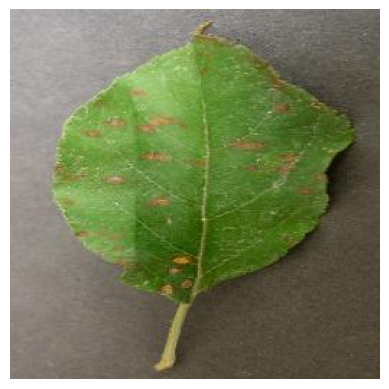

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**CNN**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Definition
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Fourth Convolutional Block
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Fifth Convolutional Block (Newly Added)
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Model Summary
model.summary()

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lower learning rate for better stability
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      13,108,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,8

 Total params: 15,225,062 (58.08 MB)

 Trainable params: 15,223,078 (58.07 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Callbacks for Early Stopping & Best Model Saving
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint("best_cnn_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
]

# Train Model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4921 - loss: 2.0516

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s 84ms/step - accuracy: 0.4922 - loss: 2.0511 - val_accuracy: 0.8533 - val_loss: 0.4979
Epoch 2/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7845 - loss: 0.7132

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 112s 82ms/step - accuracy: 0.7845 - loss: 0.7131 - val_accuracy: 0.8967 - val_loss: 0.3253
Epoch 3/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8574 - loss: 0.4708

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 81ms/step - accuracy: 0.8574 - loss: 0.4707 - val_accuracy: 0.9327 - val_loss: 0.2225
Epoch 4/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 81ms/step - accuracy: 0.8978 - loss: 0.3334 - val_accuracy: 0.9173 - val_loss: 0.2728
Epoch 5/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9202 - loss: 0.2522

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 80ms/step - accuracy: 0.9202 - loss: 0.2522 - val_accuracy: 0.9458 - val_loss: 0.1784
Epoch 6/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9402 - loss: 0.1871

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 82ms/step - accuracy: 0.9402 - loss: 0.1871 - val_accuracy: 0.9564 - val_loss: 0.1406
Epoch 7/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 82ms/step - accuracy: 0.9474 - loss: 0.1632 - val_accuracy: 0.9501 - val_loss: 0.1808
Epoch 8/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9576 - loss: 0.1356

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 82ms/step - accuracy: 0.9576 - loss: 0.1356 - val_accuracy: 0.9664 - val_loss: 0.1096
Epoch 9/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9683 - loss: 0.1018

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 85ms/step - accuracy: 0.9683 - loss: 0.1018 - val_accuracy: 0.9696 - val_loss: 0.1016
Epoch 10/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 137s 81ms/step - accuracy: 0.9717 - loss: 0.0905 - val_accuracy: 0.9661 - val_loss: 0.1135
Epoch 11/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9755 - loss: 0.0778

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9755 - loss: 0.0778 - val_accuracy: 0.9714 - val_loss: 0.0982
Epoch 12/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 80ms/step - accuracy: 0.9762 - loss: 0.0759 - val_accuracy: 0.9713 - val_loss: 0.0968
Epoch 13/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 80ms/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9699 - val_loss: 0.0953
Epoch 14/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 114s 84ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9666 - val_loss: 0.1223
Epoch 15/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9825 - loss: 0.0552

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9825 - loss: 0.0552 - val_accuracy: 0.9790 - val_loss: 0.0756
Epoch 16/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9873 - loss: 0.0396 - val_accuracy: 0.9760 - val_loss: 0.0951
Epoch 17/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9857 - loss: 0.0429 - val_accuracy: 0.9750 - val_loss: 0.0961
Epoch 18/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9758 - val_loss: 0.1006
Epoch 19/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9765 - val_loss: 0.0896
Epoch 20/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 81ms/step - accuracy: 0.9889 - loss: 0.0378 - val_accuracy: 0.9719 - val_loss: 0.1189
Epoch 21/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 85ms/step - accuracy: 0.9912 - loss: 0.0295 - val_accuracy: 0.9744 - val_loss: 0.1019
Epoch 22/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.98

**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9775 - loss: 0.0792
Validation Accuracy: 97.90%


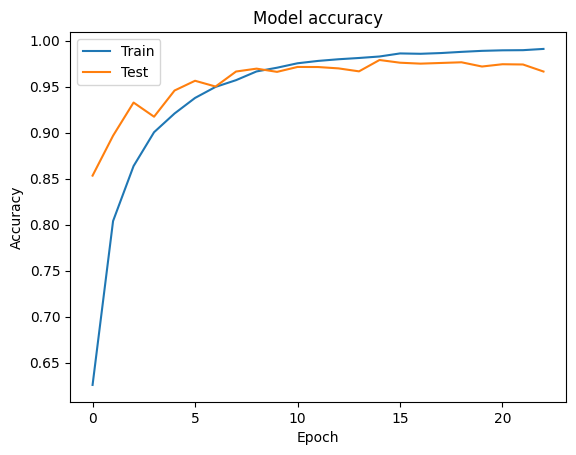

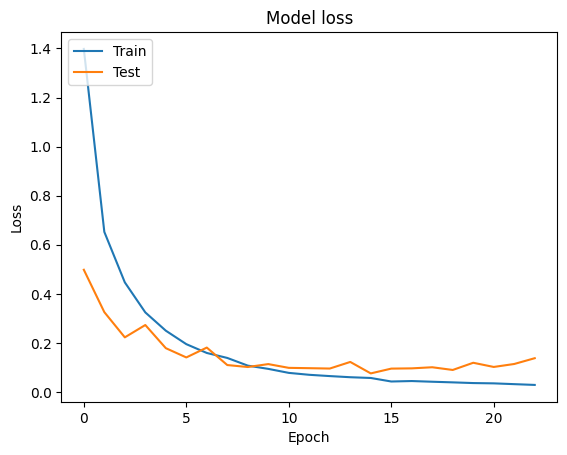

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

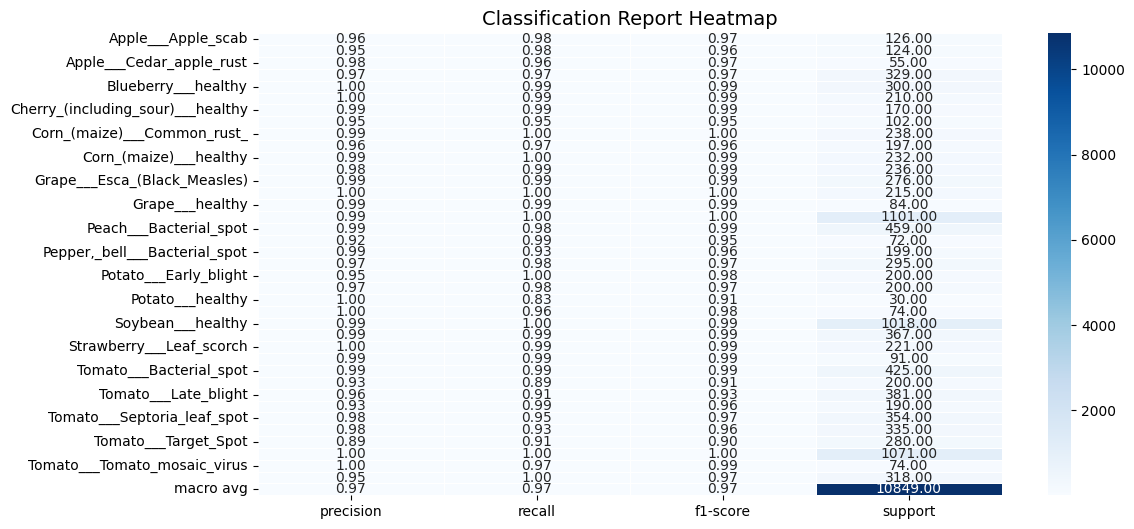

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Compute classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Convert to DataFrame and remove the "accuracy" row
df_report = pd.DataFrame(report).transpose().drop("accuracy", errors="ignore")

# Plot heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.heatmap(df_report.iloc[:-1, :], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Adjust labels for better readability
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Classification Report Heatmap", fontsize=14)

# Save the image
plt.savefig("classification_report.png", bbox_inches="tight", dpi=300)

# Show plot
plt.show()


**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class Name: Apple___Black_rot


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/trained_models/ai_crop_final.h5')

In [ ]:
model.save('plant_disease_prediction_model.h5')